In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai',grid=False)

In [2]:
df = pd.read_csv("Movie_classification.csv", header=0)


In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Dealing with missing values

In [5]:
df["Time_taken"].fillna(value=df["Time_taken"].mean(), inplace = True)

### Dummy variable creation

In [6]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

In [7]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [8]:
df.corr()['Oscar']

Marketing expense     -0.013417
Production expense    -0.024404
Multiplex coverage    -0.004017
Budget                -0.027148
Movie_length           0.016291
Lead_ Actor_Rating    -0.035309
Lead_Actress_rating   -0.040356
Director_rating       -0.035768
Producer_rating       -0.043612
Critic_rating         -0.001084
Trailer_views         -0.075783
Time_taken            -0.063753
Twitter_hastags        0.077333
Avg_age_actors         0.040581
Num_multiplex         -0.004857
Collection             0.154698
Oscar                  1.000000
3D_available_YES       0.070371
Genre_Comedy           0.021134
Genre_Drama            0.061414
Genre_Thriller        -0.072842
Name: Oscar, dtype: float64

In [26]:
X = df.drop(columns=['Oscar'])
y = df['Oscar']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Oscar, dtype: int64

In [10]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clstree = DecisionTreeClassifier(criterion='entropy')

In [14]:
clstree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_train_pred = clstree.predict(X_train)  #
y_test_pred = clstree.predict(X_test)

In [16]:
from sklearn.metrics import precision_score,recall_score


In [17]:
precision_score(y_test, y_test_pred)

0.7608695652173914

In [18]:
recall_score(y_test,y_test_pred)

0.5072463768115942

In [19]:
pd.DataFrame({'y_train':y_train,'y_pred':y_train_pred})

,y_train,y_pred
188,0,0
393,1,1
264,1,1
177,0,0
290,0,0
...,...,...
455,1,1
98,1,1
246,1,1
55,1,1


In [20]:
pd.DataFrame({'y_test':y_test,'y_pred':y_test_pred})

,y_test,y_pred
30,1,1
415,1,0
142,1,0
427,0,0
169,0,0
...,...,...
121,0,1
168,0,0
270,1,0
110,1,0


In [21]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(df,figsize=(12,8),color='k');

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)

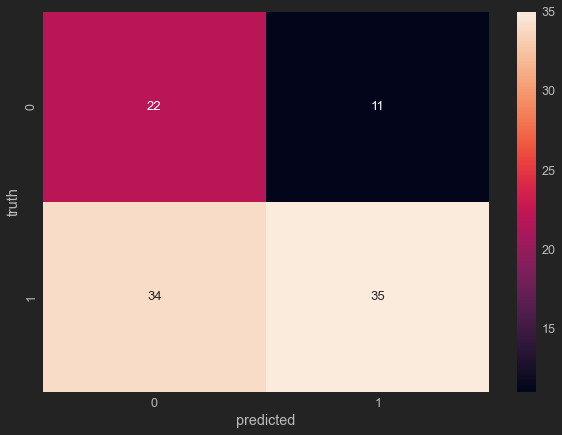

In [23]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

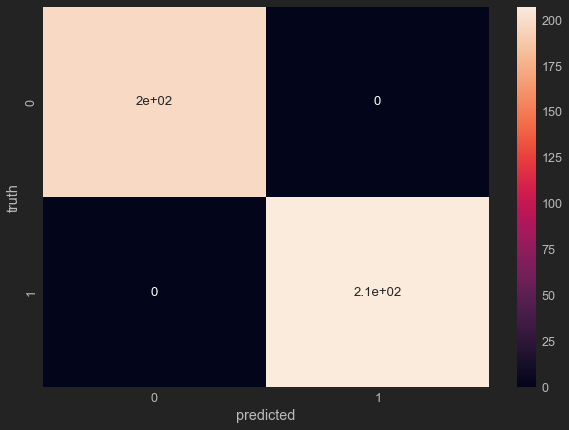

In [24]:
cm = confusion_matrix(y_train,y_train_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV